In [25]:
! pip install --upgrade setuptools



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [23]:
! pip install scikit-learn
! pip install pandas
! pip install numpy
! pip install seaborn
! pip install session-info
! pip install yellowbrick
! pip install --upgrade setuptools


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [28]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
import sklearn
from collections import Counter
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN, KMeans
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree
import pickle
import warnings
import session_info

# Removed yellowbrick KElbowVisualizer
# Removed yellowbrick SilhouetteVisualizer
# Removed statsmodels qqplot
# Alternative libraries can be used where required.

# Configurar parámetros para gráficas
plt.rcParams.update(plt.rcParamsDefault) # restore parameters
plt.rcParams['figure.figsize'] = [7, 5]
plt.rcParams['figure.dpi'] = 100
sns.set_style('darkgrid')
%matplotlib inline

# Ignorar advertencias
warnings.filterwarnings('ignore')

# Configurar visualización de dataframes
# pd.reset_option('^display.', silent=True) # reset_option('all')
pd.options.display.max_columns = None
pd.options.display.max_colwidth = 400

np.random.seed(43)

# Alternativa para reemplazar qqplot de statsmodels
import scipy.stats as stats

def generate_qqplot(data, column_name):
    stats.probplot(data[column_name], dist="norm", plot=plt)
    plt.title(f"QQ-plot of {column_name}")
    plt.show()

# Ejemplo de uso
# generate_qqplot(data, 'Age')

# Alternativa para reemplazar KElbowVisualizer y SilhouetteVisualizer
# Usar coeficiente de silueta y gráfico de inercia manualmente
def optimal_clusters(data, k_range):
    silhouette_scores = []
    inertias = []

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=43)
        labels = kmeans.fit_predict(data)
        silhouette_scores.append(silhouette_score(data, labels))
        inertias.append(kmeans.inertia_)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(k_range, silhouette_scores, marker='o')
    plt.title('Silhouette Scores')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Score')

    plt.subplot(1, 2, 2)
    plt.plot(k_range, inertias, marker='o')
    plt.title('Inertia (SSE)')
    plt.xlabel('Number of Clusters')
    plt.ylabel('SSE')

    plt.tight_layout()
    plt.show()

# Ejemplo de uso
# optimal_clusters(data[['Annual Income (k$)', 'Spending Score (1-100)']], range(2, 10))

# Imprimir información de la sesión
session_info.show(excludes=["yellowbrick"])


In [4]:
# Leer dats
df = pd.read_csv('mall_customers.csv', index_col='CustomerID')
df.shape

(200, 4)

In [6]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [7]:
#columnas
df.columns

Index(['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [9]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


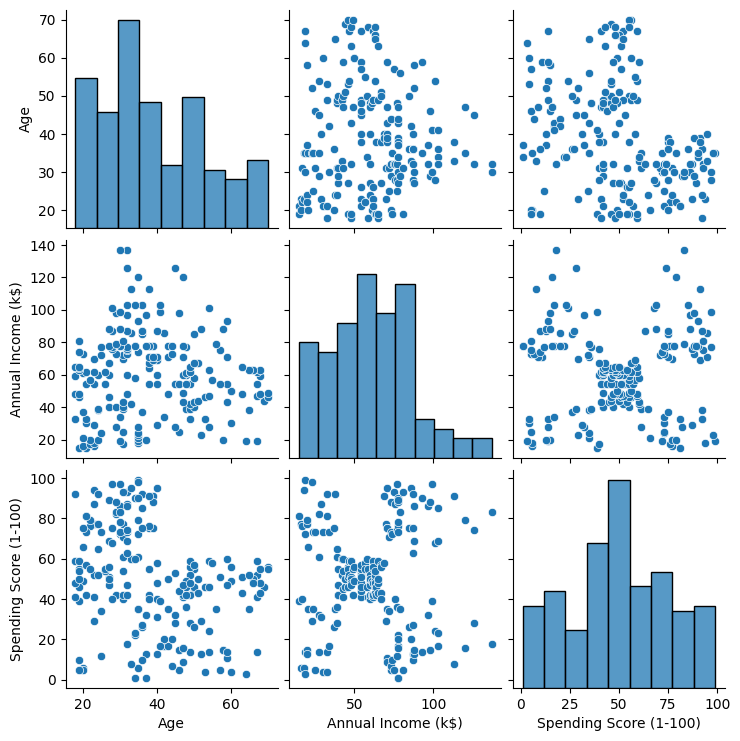

In [13]:
sns.pairplot(df)

In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
df.isna().sum()

Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [17]:
df_X = df[["Annual Income (k$)","Spending Score (1-100)"]]
df_X.head()

,Annual Income (k$),Spending Score (1-100)
CustomerID,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

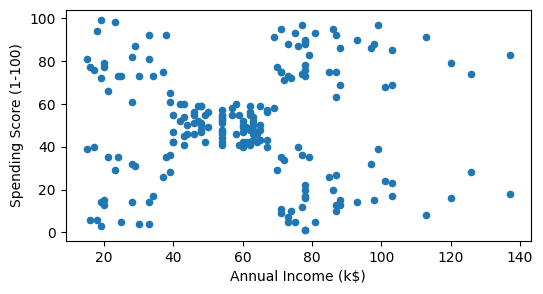

In [18]:
df_X.plot.scatter(x="Annual Income (k$)", y="Spending Score (1-100)",figsize=(6,3))

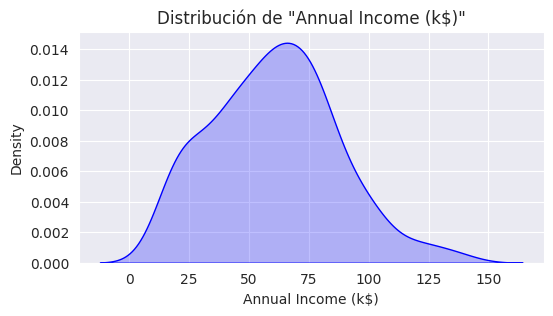

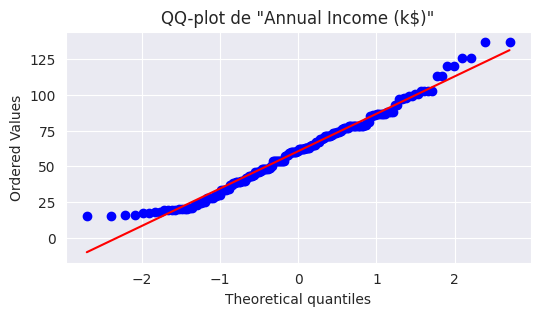

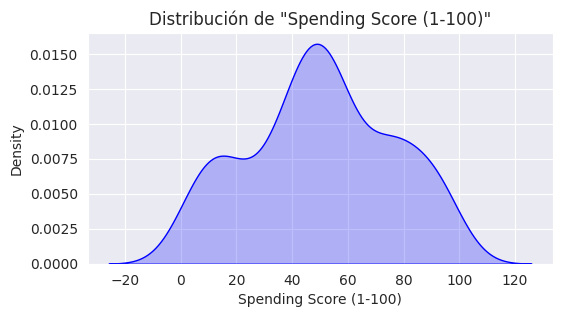

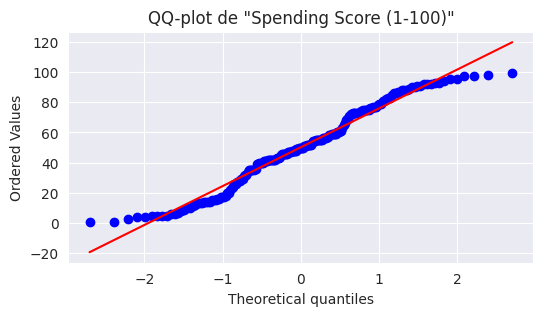

In [30]:
import scipy.stats as stats

for var_num in df_X.columns:
    # Configurar la figura para KDE Plot
    plt.figure(figsize=(6, 3), dpi=100)
    sns.kdeplot(df[var_num], fill=True, color="b")
    plt.title(f'Distribución de "{var_num}"')
    plt.show()

    # Generar QQ-plot utilizando scipy.stats.probplot
    plt.figure(figsize=(6, 3), dpi=100)
    stats.probplot(df[var_num], dist="norm", plot=plt)
    plt.title(f'QQ-plot de "{var_num}"')
    plt.show()


# Modelado

In [32]:
n_clusters = 2

model_kmeans = KMeans(n_clusters=n_clusters,random_state=43)
model_kmeans.fit(df_X)

KMeans(n_clusters=2, random_state=43)

In [33]:
y_pred_kmeans = model_kmeans.predict(df_X)
df_kmeans = df_X.copy()
df_kmeans["cluster"] = y_pred_kmeans
df_kmeans.sample(10)

,Annual Income (k$),Spending Score (1-100),cluster
CustomerID,,,
57,44,50,0
38,34,73,0
68,48,48,0
80,54,42,0
81,54,51,0
189,103,17,1
184,98,88,1
11,19,14,0
129,71,11,1


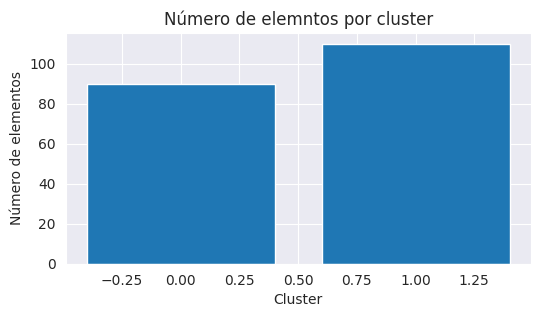

In [34]:
# Graficar elementos dpor clúster
plt.figure(figsize=(6,3),dpi=100)
plt.bar(df_kmeans["cluster"].value_counts().index, df_kmeans["cluster"].value_counts())
plt.title(f"Número de elemntos por cluster")
plt.xlabel("Cluster")
plt.ylabel("Número de elementos")
plt.show()

Text(0.5, 1.0, 'K-means con 2 clústeres')

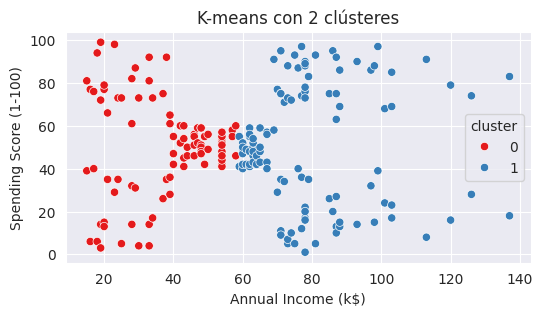

In [36]:
plt.figure(figsize=(6,3), dpi=100)
sns.scatterplot(data=df_kmeans,x="Annual Income (k$)",y="Spending Score (1-100)",hue="cluster",palette="Set1")
plt.title(f"K-means con {n_clusters} clústeres")

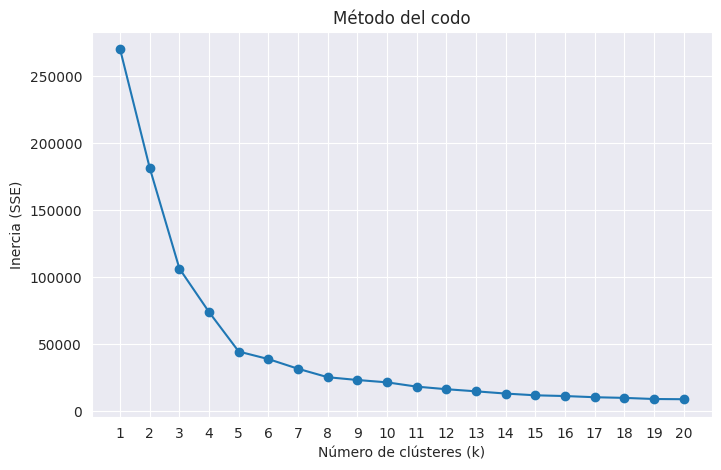

In [38]:
# Rango de clústeres a evaluar
k_range = range(1, 21)
inertias = []

# Calcular la inercia (SSE) para cada valor de k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=43)
    kmeans.fit(df_X)
    inertias.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertias, marker='o')
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Inercia (SSE)')
plt.title('Método del codo')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Determinar el número óptimo de clústeres (k)
# Usualmente se encuentra visualmente el "codo" del gráfico